In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import numpy as np


fft_size = img2.shape[:2]

def plot_numpyarr(image_np):
  plt.imshow(image_np)
  plt.axis('off')
  plt.show()

def get_mag(f):
  dm_frequency_domain = np.fft.fftshift(f)
  dm_reduced_domain = dm_frequency_domain.copy()
  # Set a threshold for magnitude to retain only the most significant coefficients
  threshold = 0.001 * np.max(np.abs(dm_reduced_domain))
  dm_reduced_domain[np.abs(dm_reduced_domain) < threshold] = 0
  transformed_image = np.log(1 + np.abs(dm_reduced_domain))
  img_filtered = torch.tensor(transformed_image)
  return img_filtered

In [ ]:
def readImage(nparr):
  # Convert image to a numpy array of shape h * w * 3 and then pass it here
  f1 = get_mag(np.fft.fft2(nparr[:,:,0]))
  f2 = get_mag(np.fft.fft2(nparr[:,:,1]))
  f3 = get_mag(np.fft.fft2(nparr[:,:,2]))

  #result = torch.stack([f1,f2,f2,torch.tensor(img[:,:,0]),torch.tensor(img[:,:,1]),torch.tensor(img[:,:,2])],0)
  result = torch.stack([f1,f2,f2],0)
  return result

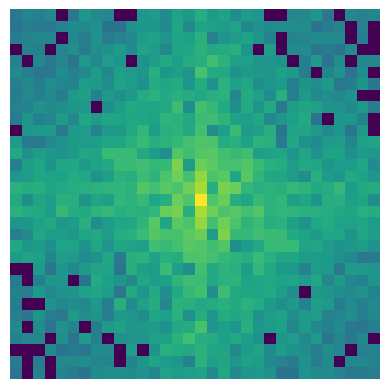

In [ ]:
plot_numpyarr(f1)

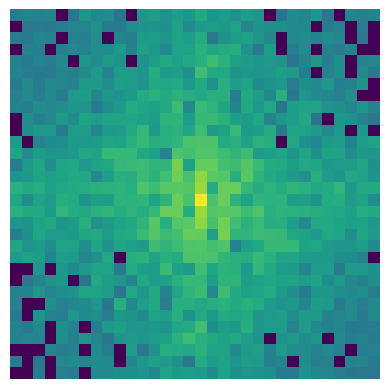

In [ ]:
plot_numpyarr(f2)

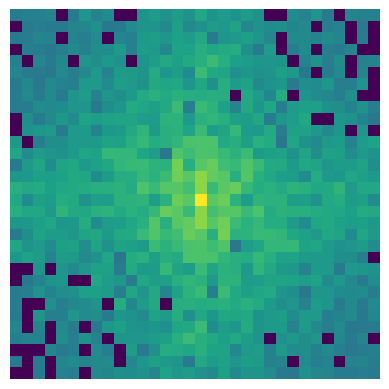

In [ ]:
plot_numpyarr(f3)